# Lecture 7

In [1]:
# imports 
# imports
import numpy as np
from scipy.ndimage import uniform_filter1d
from scipy.stats import shapiro
from matplotlib import pyplot as plt
import pandas

from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
import statsmodels.formula.api as smf

In [19]:
def set_fontsize(ax,fsz):
    """
    Set the fontsize throughout an Axis
    
    Args:
        ax (Matplotlib Axis): 
        fsz (float): Font size

    Returns:

    """
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(fsz)

# Monte Carlo

In [3]:
nrand = 100

## Random 

In [7]:
def grab_norm(size=nrand):
    return np.random.normal(size=size)

In [6]:
time = np.arange(r_norm.size)

In [9]:
data = pandas.DataFrame()
data['time'] = time

### Fit

In [10]:
data['norm'] = grab_norm()
formula = "norm ~ time"
mod1 = smf.glm(formula=formula, data=data).fit()#, family=sm.families.Binomial()).fit()

In [11]:
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   norm   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          1.0121
Method:                          IRLS   Log-Likelihood:                -141.48
Date:                Mon, 18 Apr 2022   Deviance:                       99.184
Time:                        09:23:53   Pearson chi2:                     99.2
No. Iterations:                     3   Pseudo R-squ. (CS):          0.0008158
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0668      0.200      0.334      0.738      -0.325       0.458
time          -0.0009      0.003     -0.248      0.804      -0.008       0.006
==============================================================================
"""

In [13]:
mod1.pvalues.Intercept

0.7381708057790275

### Plot

In [29]:
def plot_me(data, model, entry):
    plt.clf()
    fig = plt.figure(figsize=(12,8))
    #
    ax = plt.gca()
    ax.plot(data['time'], data[entry], 'o', ms=2)
    # Fit
    ax.plot(data['time'], mod1.fittedvalues, label=f'p-value({entry}) = {mod1.pvalues.Intercept}')
    #
    set_fontsize(ax, 17)
    ax.legend(fontsize=17)
    #
    plt.show()

### Run a bunch

<Figure size 432x288 with 0 Axes>

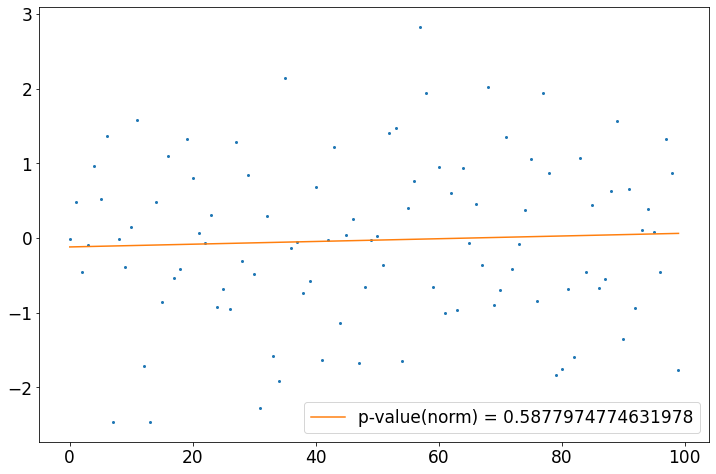

In [32]:
key = 'norm'
data[key] = grab_norm()
formula = f"{key} ~ time"
mod1 = smf.glm(formula=formula, data=data).fit()#, family=sm.families.Binomial()).fit()
plot_me(data, mod1, key)

# Log-normal

In [33]:
def grab_lognorm(size=nrand):
    return np.random.lognormal(size=size)

<Figure size 432x288 with 0 Axes>

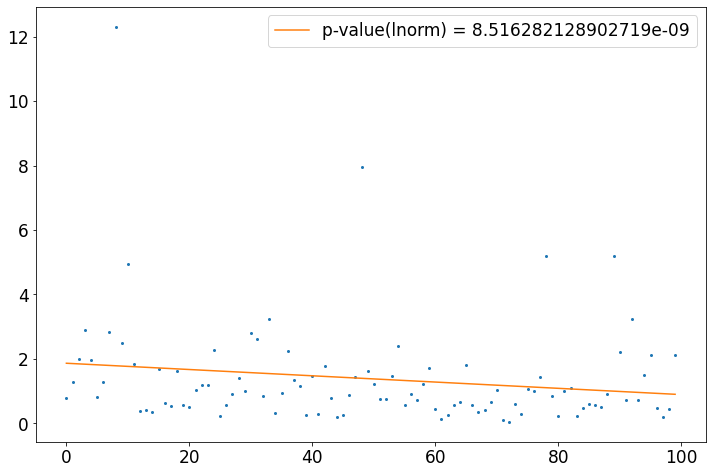

In [37]:
key = 'lnorm'
data[key] = grab_lognorm()
formula = f"{key} ~ time"
mod1 = smf.glm(formula=formula, data=data).fit()#, family=sm.families.Binomial()).fit()
plot_me(data, mod1, key)

In [38]:
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  lnorm   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          2.6656
Method:                          IRLS   Log-Likelihood:                -189.90
Date:                Mon, 18 Apr 2022   Deviance:                       261.23
Time:                        09:31:20   Pearson chi2:                     261.
No. Iterations:                     3   Pseudo R-squ. (CS):            0.02937
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8661      0.324      5.758      0.000       1.231       2.501
time          -0.0097      0.006     -1.721      0.085      -0.021       0.001
==============================================================================
"""